# Рекомендация тарифов

В вашем распоряжении данные о поведении клиентов, которые уже перешли на эти тарифы (из проекта курса «Статистический анализ данных»). Нужно построить модель для задачи классификации, которая выберет подходящий тариф. Предобработка данных не понадобится — вы её уже сделали.

Постройте модель с максимально большим значением *accuracy*. Чтобы сдать проект успешно, нужно довести долю правильных ответов по крайней мере до 0.75. Проверьте *accuracy* на тестовой выборке самостоятельно.

## Откройте и изучите файл

In [6]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

data = pd.read_csv('https://code.s3.yandex.net/datasets/users_behavior.csv')
display(data)

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0
...,...,...,...,...,...
3209,122.0,910.98,20.0,35124.90,1
3210,25.0,190.36,0.0,3275.61,0
3211,97.0,634.44,70.0,13974.06,0
3212,64.0,462.32,90.0,31239.78,0


Комментарий: Т.к у нас нет тестовой выборки то придется разделить данный датасет 3:1:1 или 60:20:20 (%). В качестве целей возьмем столбец is_ultra, а в качестве признаков будут выступать все остальные столбцы.

## Разбейте данные на выборки

In [7]:
features = data.drop(['is_ultra'], axis = 1)
target = data['is_ultra']

# Получение пропорции 60:40

features_train, features_40, target_train, target_40 = train_test_split(
    features, target, test_size = 0.40, random_state = 12345, stratify = target)

# Разделение 40 % на две части

features_valid, features_test, target_valid, target_test = train_test_split(
    features_40, target_40, test_size = 0.50, random_state = 12345, stratify = target_40)

Комментарий: Чтобы получить признаки избавимся от столбца is_ultra, чтобы получить цели запишем столбец is_ultra в отдельную переменную. Также мы разделили данные в пропорции 60:20:20. Одним из важных параметров, является параметр stratify, который позволяет сохранить пропорции исходного датасета и разделенных.

## Исследуйте модели

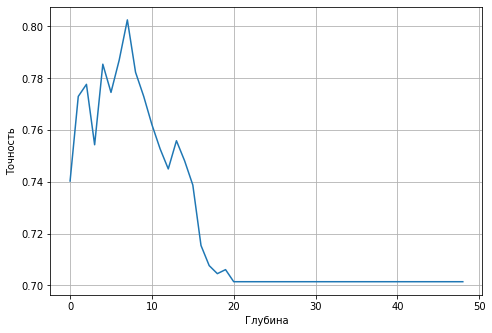

Лучшая точность: 0.80248833592535 c значением глубины = 8


In [8]:
# Решающее дерево

best_model_tree = None
best_result = 0
accuracy_arr_tree = []

for i in range(1, 50):
    
    model = DecisionTreeClassifier(random_state=12345, max_depth=i)
    model.fit(features_train, target_train)
    prediction = model.predict(features_valid)
    result = accuracy_score(target_valid, prediction)
    accuracy_arr_tree.append(result)
    
    if best_result < result:
        best_result = result
        depth = i
        best_model_tree = model

accuracy_arr_tree = pd.Series(accuracy_arr_tree) 

fig = plt.figure()

ax = fig.add_axes([0,0,1,1])

ax.grid()
ax.set_xlabel('Глубина')
ax.set_ylabel('Точность')
    
ax.plot(accuracy_arr_tree.index, accuracy_arr_tree)
plt.show()

print("Лучшая точность:", best_result, 'c значением глубины =', depth)

Комментарий: Данная модель показывает неплохой результат относительно минимума (0.75) для задачи, НО я бы если честно не назвал это неплохим результатом т.к мы получаем 20 процентов неверных результатов, а это на минуточку 642 неверно определенных значений, забегу вперед в остальных моделях мы также не сможем добится хотя-бы 10% ошибок. Исходя из графика мы можем сказать, что переобучение наступает при глубине = 8, а когда глубина достигает значения 20, то мы наблюдаем абсолютно ровный график точности что говорит нам о том что она вовсе перестала изменятся. Ну и вывод такой-же как и в тренажере быстро, но не точно и снова забегая вперед скажем, что регрессия покажет себя хуже, наверное, данных мало...

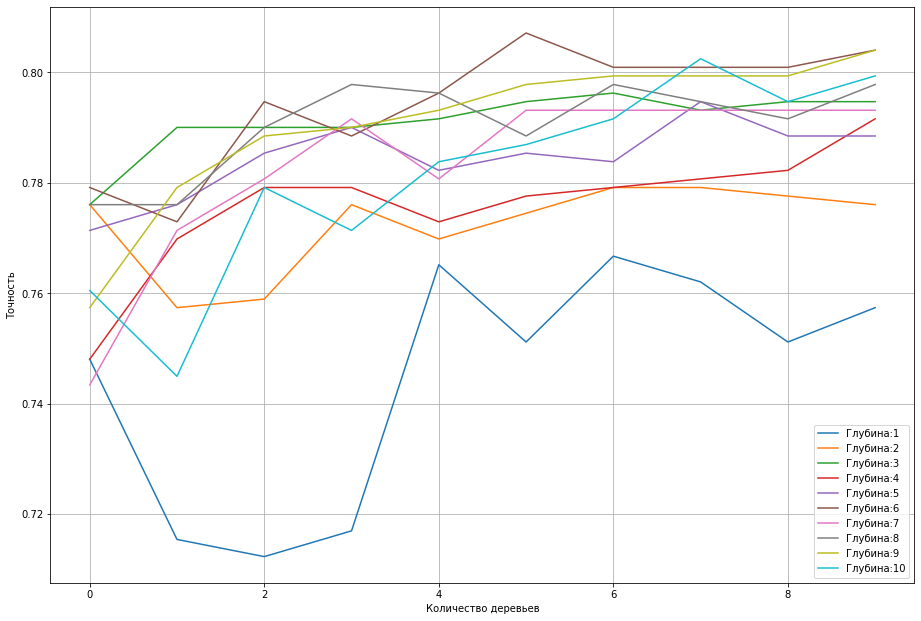

Лучшая точность:  0.807153965785381 при глубине = 6 и количестве деревьев = 6


,1,2,3,4,5,6,7,8,9,10
0,0.748056,0.776050,0.776050,0.748056,0.771384,0.779160,0.743390,0.776050,0.757387,0.760498
1,0.715397,0.757387,0.790047,0.769829,0.776050,0.772939,0.771384,0.776050,0.779160,0.744946
2,0.712286,0.758942,0.790047,0.779160,0.785381,0.794712,0.780715,0.790047,0.788491,0.779160
3,0.716952,0.776050,0.790047,0.779160,0.790047,0.788491,0.791602,0.797823,0.790047,0.771384
4,0.765163,0.769829,0.791602,0.772939,0.782271,0.796267,0.780715,0.796267,0.793157,0.783826
5,0.751166,0.774495,0.794712,0.777605,0.785381,0.807154,0.793157,0.788491,0.797823,0.786936
6,0.766719,0.779160,0.796267,0.779160,0.783826,0.800933,0.793157,0.797823,0.799378,0.791602
7,0.762053,0.779160,0.793157,0.780715,0.794712,0.800933,0.793157,0.794712,0.799378,0.802488
8,0.751166,0.777605,0.794712,0.782271,0.788491,0.800933,0.793157,0.791602,0.799378,0.794712
9,0.757387,0.776050,0.794712,0.791602,0.788491,0.804044,0.793157,0.797823,0.804044,0.799378


In [9]:
# Случайный лес (голосование)

best_model_rand_forest = None
rand_forest_res = {}
best_result = 0
best_est = 0
best_depth = 0

for depth in range(1,11):
    accuracy_arr_rand_forest = []
    for est in range(1, 11):
        model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth = depth)
        model.fit(features_train, target_train)
        prediction = model.predict(features_valid)
        result = accuracy_score(target_valid, prediction)
        accuracy_arr_rand_forest.append(result)
        
        if best_result < result:
            best_result = result
            best_est = est
            best_depth = depth
            best_model_rand_forest = model
        
    rand_forest_res.update({depth : accuracy_arr_rand_forest})

data_rand_forest = pd.DataFrame(rand_forest_res)

fig = plt.figure()

ax = fig.add_axes([0,0,2,2])

ax.grid()
ax.set_xlabel('Количество деревьев')
ax.set_ylabel('Точность')

for name_column in range(len(data_rand_forest)):
    ax.plot(data_rand_forest.index, data_rand_forest[name_column + 1], label = 'Глубина:' + str(name_column + 1))
    
ax.legend()
plt.show()

print('Лучшая точность: ', data_rand_forest.max().max(), 'при глубине = {0} и количестве деревьев = {1}'.format(best_depth, best_est))
display(data_rand_forest)

Комментарий: Исходя из полученных данных, мы зафиксировали что наилучший результат получается при глубине = 6 и количестве деревьев = 6, что подтверждает график и полученный df. Это лучшее значение из всех трех моделей, но алгоритм работает достаточно медленно, особенно если попытаться увеличить значения глубины и количества деревьев. Таким образом делаем вывод: алгоритм точный, но медленный.

In [11]:
# Модель логистической регрессии

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

model_LR = LogisticRegression(random_state=12345)
model_LR.fit(features_train, target_train)
prediction = model_LR.predict(features_valid)
result = accuracy_score(target_valid, prediction)
print('Точность:', result)

Точность: 0.71850699844479


Комментарий: Ну что-то совсем плохо. Как говорил ранее возможно мало данных, но возможно ещё потому что мало признаков в теории у нас была таблица в которой было в несколько раза больше столбцов (признаков).

## Проверьте модель на тестовой выборке

In [12]:
# Проверка работы моделей с тестовыми данными

prediction_tree = best_model_tree.predict(features_test)
result_tree = accuracy_score(target_test, prediction_tree)

prediction_rand_forest = best_model_rand_forest.predict(features_test)
result_rand_forest = accuracy_score(target_test, prediction_rand_forest)

prediction_LR = model_LR.predict(features_test)
result_LR = accuracy_score(target_test, prediction_LR)

print('Дерево решений:', result_tree)
print('Рандомный лес:', result_rand_forest)
print('Логистическая регрессия:', result_LR)

Дерево решений: 0.7838258164852255
Рандомный лес: 0.8102643856920684
Логистическая регрессия: 0.7107309486780715


Комментарий: Как видно особенно ничего не поменялось, лучше даже чем на валидационной выборке себя проявил случаный лес.

## (бонус) Проверьте модели на адекватность

In [13]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy="most_frequent", random_state=0)

dummy_clf.fit(features, target)

print('Минимальная базовая точность:', dummy_clf.score(features, target))

Минимальная базовая точность: 0.693528313627878


Комментарий: Перед тем как строить модель, мы должны посмотреть а вообще имеет ли смысл ее строить, что если данных одного класса 90% тогда и точность должны быть больше 90% ну а если так то вообще нужно ли что-то предсказывать? В нашей задаче порог который нужно преодолеть, это 0.69, мы преодолели его в каждой модели, а значит наши модели имеют место быть. P.S Это как я понял зачем это нужно, если я не прав, то пожалуйста поправь. 

# Вывод

В данном проекте получилось сделать следующее:

1. Разделить данные + использовать сохранение пропорций (stratify);
2. Рассмотрены 3 модели, а именно (Решающее дерево, случайный лес, логистическая регрессия);
3. Для каждой выбраны наилучшие гиперпараметры;
4. Построены графики зависимости точности от изменения гиперпараметров;
5. Выбрана модель с лучшей точностью (Случайный лес);
6. Мы увидели, что при небольшом количестве признаков точность логистической регрессии падает;
7. Осуществлена проверка моделей на адекватность.

Общий вывод: Для определения тарифа для пользователей лучше всего подходит использование модели случайного леса т.к дерево показывает более низкий результат, а для регресии у нас недостаточно признаков.